Loading dataset ...
0    2138
2    2121
Name: class, dtype: int64


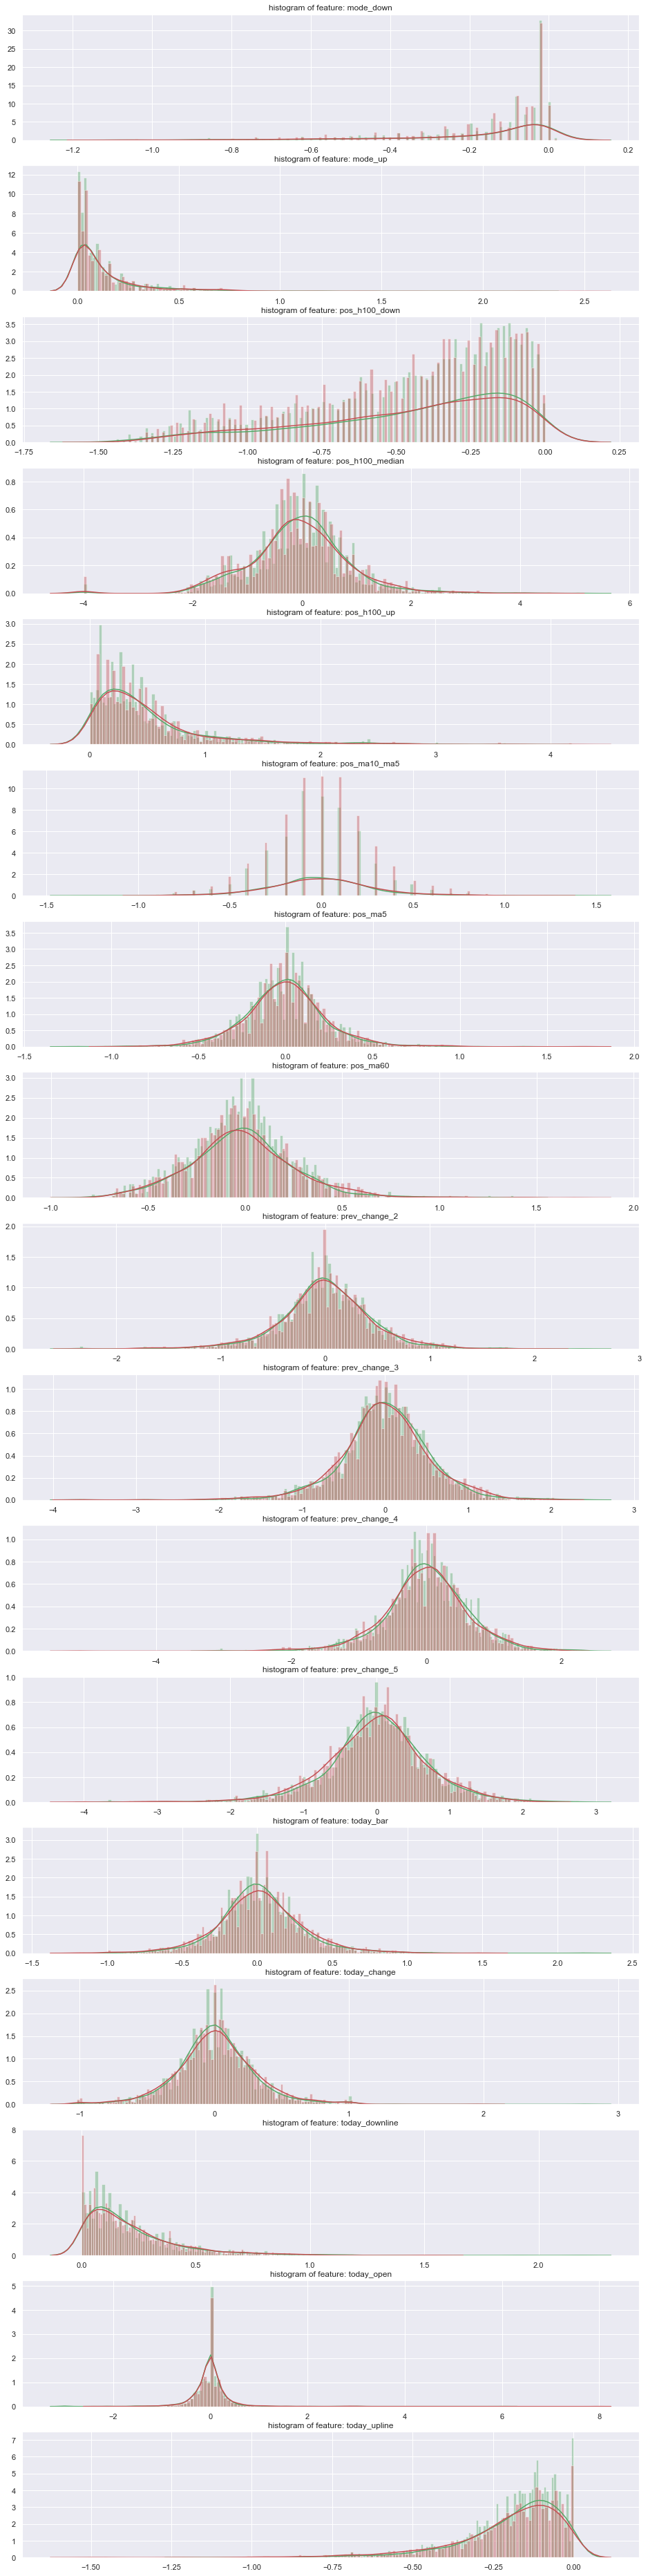

In [50]:
#!/usr/bin/env python3

import json, math
import pandas as pd
import numpy as np
import os,sys

import keras
from keras.models import Model, load_model
from keras.layers import Dense, Input
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

np.random.seed(1337)  # for reproducibility

filename = 'featured_v3.1-HS300-2006-2012.csv'
ml_filename = 'ml_balanced_data.csv'


# 设置显示宽度
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
encoding_dim = 2

print('Loading dataset ...')
# if not os.path.isfile(ml_filename):
if True:
	source_data = pd.DataFrame().from_csv(filename)
	source_data = source_data.drop(['date','security','latest_price'],axis=1)

	step = 3
	source_data['future_change'] = round(source_data['future_change'] * 10,0)
	source_data['future_change'] = source_data.drop(source_data[source_data.future_change>10].index)
	source_data['future_change'] = source_data.drop(source_data[source_data.future_change<-10].index)
# 	source_data['future_change'] = round(source_data['future_change'] /step ,0)
	source_data['class'] = source_data['future_change']

	class0 = source_data[source_data.future_change<1]
	class1 = source_data[source_data.future_change==0]
	class2 = source_data[source_data.future_change>1]
    
	class0.loc[:,'class']= 0 # 下跌
	class1.loc[:,'class']= 1 # 横盘
	class2.loc[:,'class']= 2 # 上涨

	samples = min([len(class0),len(class2)])

	class0 = class0.sample(samples)
# 	class1 = class1.sample(samples)
	class2 = class2.sample(samples)

	data = class0.append(class2)
# 	data = data.append(class2)
	data = data.sample(samples)

	data.to_csv(ml_filename)
else:
	data = pd.DataFrame().from_csv(ml_filename)

print( data['class'].value_counts()  )


# Y = np_utils.to_categorical(data['class'])
data = data.drop(['future_change'],axis=1)
# plt.figure(figsize=(12,8))
# sns.heatmap(data[data['class']==0].corr(method='spearman'), xticklabels=data.columns, yticklabels=data.columns)
# plt.figure(figsize=(12,8))
# sns.heatmap(data[data['class']==1].corr(method='spearman'), xticklabels=data.columns, yticklabels=data.columns)
# plt.figure(figsize=(12,8))
# sns.heatmap(data[data['class']==2].corr(method='spearman'), xticklabels=data.columns, yticklabels=data.columns)

# plt.figure(figsize=(12,20))
# data[data['class']==0].boxplot()
# plt.figure(figsize=(12,20))
# data[data['class']==1].boxplot()
# plt.figure(figsize=(12,20))
# data[data['class']==2].boxplot()

from matplotlib import gridspec
x_feature = list(data.columns)
x_feature = x_feature[:-1]

plt.figure(figsize=(16,30*4))
gs = gridspec.GridSpec(30, 1)#创建20行1列的画布
for i, cn in enumerate(data[x_feature]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data["class"] == 0], bins=150, color='g')
    sns.distplot(data[cn][data["class"] == 1], bins=150, color='y')
    sns.distplot(data[cn][data["class"] == 2], bins=150, color='r')    
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))


# sns.pairplot(data)
plt.show()

# y=source_data['future_value'].values
# x=source_data
# del x['future_value']
# del x['security']
# del x['price_ma60_trend']
# del x['price_pos_60']
# del x['history_amp_100']
# del x['history_amp_60']
# x=x.values



In [54]:
np.argmax([0.9,0.4,0.8])

0